In [62]:
import pandas as pd
import numpy as np

In [63]:
data = pd.DataFrame(np.load('../emb_data.npy'))

In [64]:
labels = data[128]

In [65]:
data.drop([128], inplace=True, axis=1)

In [66]:
labels

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      2.0
21      2.0
22      2.0
23      2.0
24      2.0
25      2.0
26      2.0
27      2.0
28      2.0
29      3.0
       ... 
446    58.0
447    58.0
448    58.0
449    58.0
450    58.0
451    58.0
452    58.0
453    59.0
454    59.0
455    59.0
456    59.0
457    59.0
458    59.0
459    59.0
460    59.0
461    59.0
462    59.0
463    59.0
464    59.0
465    59.0
466    60.0
467    60.0
468    60.0
469    60.0
470    60.0
471    60.0
472    60.0
473    60.0
474    60.0
475    60.0
Name: 128, Length: 476, dtype: float64

In [60]:
from sklearn import decomposition
pca = decomposition.PCA()


In [61]:
pca.n_components = 2
pca_data = pca.fit_transform(data)
pca_data = np.vstack((pca_data.T, labels)).T


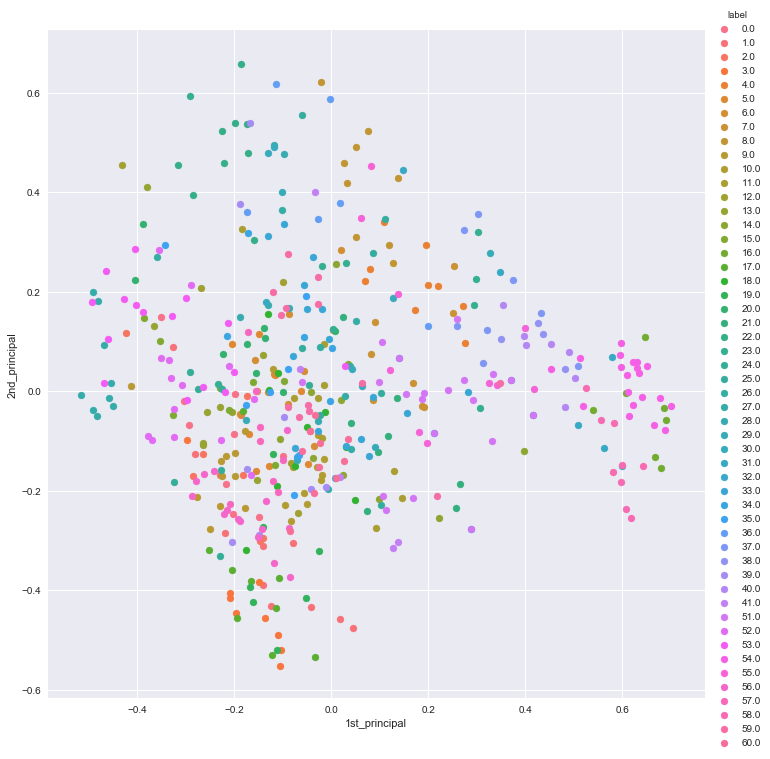

In [47]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df,hue='label', size=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=42)

clf_tuned = KNeighborsClassifier(algorithm='auto', n_neighbors=1, weights='uniform')
clf_tuned.fit(X_train, y_train)
y_pred = clf_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
clf_tuned.score(X_test, y_test)


0.91666666666666663

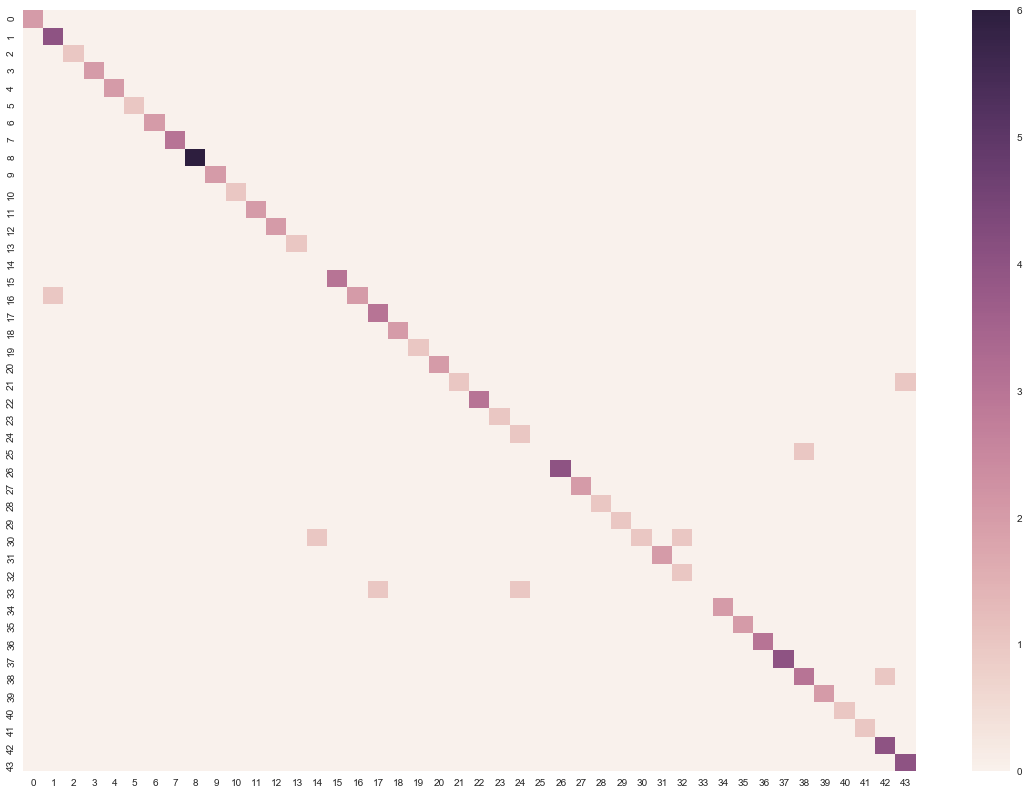

In [89]:
plt.figure(figsize = (20,14))

ax = sns.heatmap(cm)


In [104]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.5, random_state=0)
for train_idx, test_idx in sss:
    knn = KNeighborsClassifier(algorithm='auto', n_neighbors=1, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro"))

0.876677489177
0.884090909091
0.892045454545


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
